# Part 1


Considering the given expression:

$$
\begin{align*}
\exp\left(-\frac{1}{2}(\tau+n\phi)\left(\theta - \frac{1}{\tau+n\phi}\left(\tau\theta_0+\phi\sum_{i=1}^{n}x_{i}\right)\right)^2\right)
\end{align*}
$$

This expression, representing the probability density function (pdf) of a normal distribution, allows us to introduce:

$$
\mu = \frac{1}{\tau+n\phi}\left(\tau\theta_0+\phi\sum_{i=1}^{n}x_{i}\right)
$$

Subsequently, revisiting and expanding the equation:

$$
\begin{align*}
\left(\theta - \mu\right)^2 &= \theta^2 - 2\theta\mu + \mu^2 \\
&= \theta^2 - 2\theta\frac{\tau\theta_0+\phi\sum_{i=1}^n x_i}{\tau+n\phi} + \left(\frac{\tau\theta_0+\phi\sum_{i=1}^n x_i}{\tau+n\phi}\right)^2 \\
\end{align*}
$$

Next, introducing a multiplication factor of $-\frac{1}{2}(\tau+n\phi)$:

$$
-\frac{1}{2}(\tau+n\phi)\theta^2 + (\tau\theta_0+\phi\sum_{i=1}^n x_i)\theta - \frac{1}{2}\left(\tau\theta_0+\phi\sum_{i=1}^n x_i\right)^2\left(\frac{1}{\tau+n\phi}\right)
$$

Now, the expression is recast in quadratic form, enabling the rephrasing of the original expression as:

$$
\exp\left(-\frac{1}{2}(\tau+n\phi)\theta^2 + (\tau\theta_0+\phi\sum_{i=1}^n x_i)\theta - \frac{1}{2}\left(\frac{1}{\tau+n\phi}\right)\left(\tau\theta_0+\phi\sum_{i=1}^n x_i\right)^2\right)
$$


# Part 2

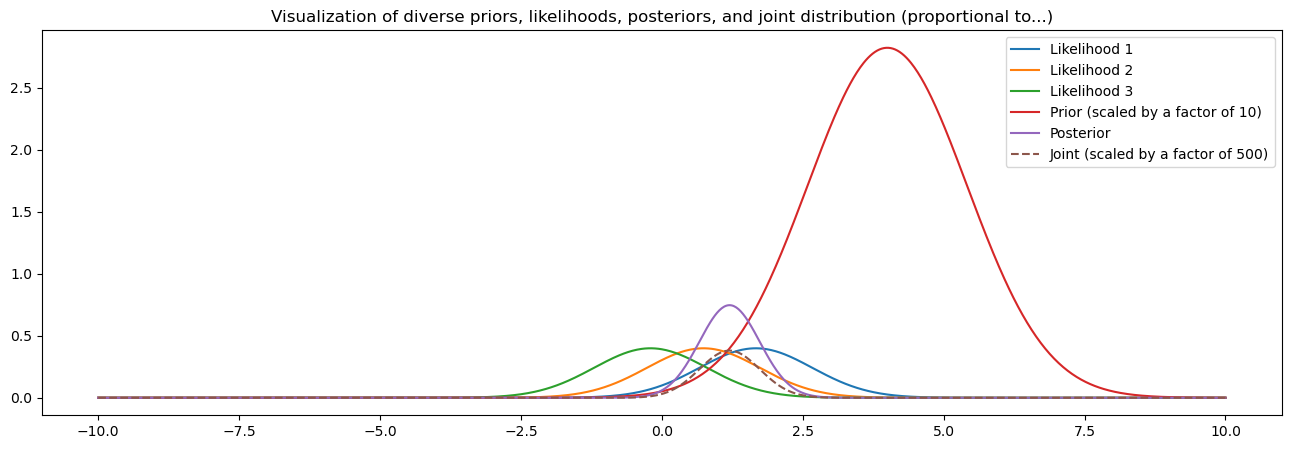

In [15]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(2024)

sample_size = 3
data_points = stats.norm(loc=0, scale=1).rvs(sample_size)
prior_mean_value, precision_value = 4, 1/2
parameter_range = np.linspace(-10, 10, 1001)


likelihoods_list = []
# Compute likelihood for each observation using a for loop
for xi in data_points:
    individual_likelihood = stats.norm.pdf(parameter_range, loc=xi, scale=1)
    likelihoods_list.append(individual_likelihood)


prior_distribution = stats.norm(loc=prior_mean_value, scale=1/precision_value**0.5).pdf(parameter_range)
joint_distribution = 500 * np.prod(likelihoods_list, axis=0) * prior_distribution

posterior_distribution = stats.norm(
    loc=(precision_value * prior_mean_value + data_points.sum()) / (precision_value + sample_size),
    scale=1 / (precision_value + sample_size)**0.5
).pdf(parameter_range)

plt.figure(figsize=(16, 5))

# Plot individual likelihoods for each observation
for i, xi in enumerate(data_points):
    plt.plot(parameter_range, likelihoods_list[i], label=f"Likelihood {i+1}")

plt.plot(parameter_range, 10*prior_distribution, label="Prior (scaled by a factor of 10)")
plt.plot(parameter_range, posterior_distribution, label="Posterior")
plt.plot(parameter_range, joint_distribution, linestyle="--", label="Joint (scaled by a factor of 500)")

plt.legend()
plt.title("Visualization of diverse priors, likelihoods, posteriors, and joint distribution (proportional to...)")
plt.show()

In [14]:
data_points

array([ 1.66804732,  0.73734773, -0.20153776])

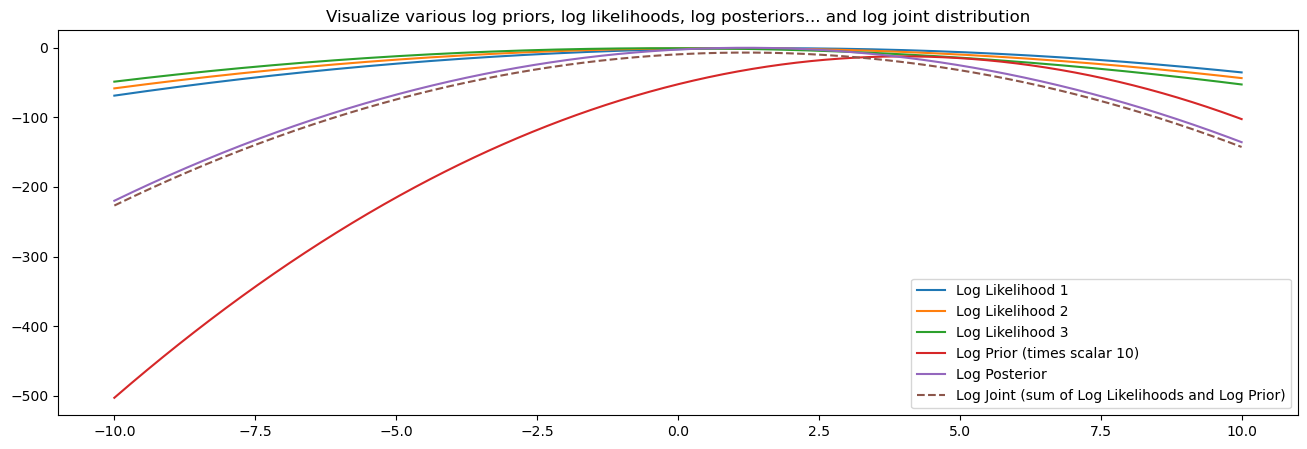

In [21]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(2024)
# Set up parameters
num_samples = 3
observations = stats.norm(loc=0, scale=1).rvs(num_samples)
prior_mean, prior_precision = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

# Log likelihood calculation for each observation
log_likelihoods = []

for observation in observations:
    likelihood = stats.norm.logpdf(parameter_domain, loc=observation, scale=1)
    log_likelihoods.append(likelihood)

# Prior, Joint, and Posterior
log_prior = stats.norm(loc=prior_mean, scale=1/np.sqrt(prior_precision)).logpdf(parameter_domain)
log_joint = np.sum(log_likelihoods, axis=0) + log_prior
posterior_mean = (prior_precision * prior_mean + observations.sum()) / (prior_precision + num_samples)
posterior_scale = 1 / np.sqrt(prior_precision + num_samples)
log_posterior = stats.norm(loc=posterior_mean, scale=posterior_scale).logpdf(parameter_domain)

# Plotting
plt.figure(figsize=(16, 5))

for i, individual_log_likelihood in enumerate(log_likelihoods):
    plt.plot(parameter_domain, individual_log_likelihood, label=f"Log Likelihood {i+1}")

plt.plot(parameter_domain, 10*log_prior, label="Log Prior (times scalar 10)")
plt.plot(parameter_domain, log_posterior, label="Log Posterior")
plt.plot(parameter_domain, log_joint, linestyle="--", label="Log Joint (sum of Log Likelihoods and Log Prior)")

plt.legend()
plt.title("Visualize various log priors, log likelihoods, log posteriors... and log joint distribution")
plt.show()




## Likelihood Function

We start with the likelihood of a normal distribution:

$$ p(x \mid \theta, \phi) = \prod_{i=1}^n \sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_i-\theta\right)^2} $$

where $x$ is the observed data, $\theta$ is the mean, and $\phi$ is the precision parameter.

## Posterior Distribution

Given a non-informative prior, $p(\theta) \propto 1$, we can find the posterior distribution from the joint distribution:

$$
\begin{align*}
p(\theta \mid x) &\propto p(x|\theta)p(\theta)\\
                 &\propto \prod_{i=1}^n \sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_i-\theta\right)^2}\\
                 &= (\sqrt{\frac{\phi}{2 \pi}})^{n} e^{-\frac{\phi}{2} \sum_{i=1}^n\left(x_i-\theta\right)^2}
\end{align*}
$$

Simplifying, as $(\sqrt{\frac{\phi}{2 \pi}})^{n}$ is a constant:

$$
p(\theta \mid x) \propto e^{-\frac{\phi}{2} \sum_{i=1}^n\left(x_i-\theta\right)^2}
$$

## Expanding the Component

Expanding the component inside the exponential term:

$$
\begin{align*}
-\frac{\phi}{2}\sum_{i=1}^n\left(x_i-\theta\right)^2 &= -\frac{\phi}{2}[n \bar{x}^2-2 n \bar{x} \theta+n \theta^2]\\
&= -\frac{\phi}{2}\left[n\left(\theta^2-2 \bar{x} \theta+\bar{x}^2\right)\right]\\
&= -\frac{\phi}{2} n(\theta-\bar{x})^2
\end{align*}
$$

## Conclusion

Therefore, we conclude that the posterior distribution is:

$$
\theta \mid x \sim \mathcal{N}\left(\bar{x}, \frac{\sigma^2}{n}\right)
$$

where $\bar{x}$ is the sample mean, $n$ is the sample size, and $\sigma^2$ is the variance associated with the likelihood function.




## Log Likelihood Consistency

Log likelihoods remain consistent and unaffected by the choice of prior. They are solely determined by the data and the model parameters. The log likelihood is a measure of how well the model explains the observed data.

## Improper Priors and Posterior Distribution

The posterior distribution is obtained by multiplying the likelihood and the prior. If an improper prior is used, it may lead to an improper posterior distribution. An improper posterior lacks the characteristics of a valid probability distribution, such as normalization.

## Influence of Likelihood

However, the influence of an improper prior can be outweighed by a sufficiently informative likelihood. If the likelihood contains enough information, it can dominate the posterior calculation, potentially resulting in a valid posterior distribution.

In summary, while log likelihoods are robust and independent of the choice of prior, the use of an improper prior may impact the posterior distribution. The role of the likelihood becomes crucial in such cases, as it can mitigate the effects of an improper prior when it contains substantial information.
